# Bicycle Commuting Data

In [217]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

The data used for the analysis was taken from three datasets of Mexico City's government [website](https://datos.cdmx.gob.mx/):

| Dataset                         | Location    | Date of download |
| ------------------------------- | ------------------------------------------------------------ | ---------------- |
| Bicycle counter                 | https://datos.cdmx.gob.mx/dataset/contador-ciclistas         | 11-Dec-2020      |
| Road accidents                  | https://datos.cdmx.gob.mx/dataset/incidentes-viales-c5       | 11-Dec-2020      |
| Estudio de Conteo ciclista 2018 | https://datos.cdmx.gob.mx/dataset/estudio-de-conteo-ciclista-2018 | 11-Dec-2020      |

I have already downloaded them in the /Data directory, so let's import them.

In [218]:
contador = pd.read_csv('Data/contador-ciclistas.csv')
incidentes = pd.read_csv('Data/incidentes-viales-c5.csv')
estudio = pd.read_csv('Data/estudio-de-conteo-ciclista-2018.csv')

## 1. Bicycle counter

### Data exploration

In [219]:
contador.head()

,Día de la semana,Día,Mes,Año,Contador Ruta Reforma222,Contador Ruta Revolución,Contador Ruta Patriotismo
0,jueves,5,diciembre,2013,2516.0,NaN,NaN
1,lunes,9,diciembre,2013,2132.0,NaN,NaN
2,viernes,22,junio,2018,2913.0,980.0,1163.0
3,martes,10,julio,2018,2531.0,877.0,1013.0
4,sábado,7,julio,2018,1534.0,616.0,584.0


In [220]:
contador.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2374 entries, 0 to 2373
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Día de la semana           2374 non-null   object 
 1   Día                        2374 non-null   int64  
 2   Mes                        2374 non-null   object 
 3   Año                        2374 non-null   int64  
 4   Contador Ruta Reforma222   2150 non-null   float64
 5   Contador Ruta Revolución   1382 non-null   float64
 6   Contador Ruta Patriotismo  1386 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 130.0+ KB


In [221]:
contador.isnull().sum()

Día de la semana               0
Día                            0
Mes                            0
Año                            0
Contador Ruta Reforma222     224
Contador Ruta Revolución     992
Contador Ruta Patriotismo    988
dtype: int64

It seems that the counters didn't start recolecting data at the same time. We should see when did each start by  visualizing where exactly are the null values. However, the dataset is not ordered by date, so let's transform the dates to a datetime format.

### Data cleaning

In [222]:
# Change column names
contador.columns

Index(['Día de la semana', 'Día', 'Mes', 'Año', 'Contador Ruta Reforma222',
       'Contador Ruta Revolución', 'Contador Ruta Patriotismo'],
      dtype='object')

In [223]:
contador.columns = ['Día de la semana', 'Día', 'Mes', 'Año', 'Reforma', 'Revolución', 'Patriotismo']

In [224]:
# Transform months to categories to order them.
meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
contador['Mes'] = pd.Categorical(contador['Mes'], meses)

# Order values in descending order.
contador = contador.sort_values(['Año', 'Mes', 'Día'])

# Change months back to object type
contador['Mes'] = contador['Mes'].astype('object')

In [225]:
# Label-encode months
dict_meses = {}
number = 0
for mes in meses: 
    number += 1
    dict_meses[mes] = number
    
contador['Mes'] = contador['Mes'].map(dict_meses)

In [226]:
# Create new column with complete date
contador.insert(4, 'Fecha', pd.to_datetime(contador.Año*10000+contador.Mes*100+contador.Día, format='%Y%m%d'))

In [227]:
# Reset indexes
contador = contador.reset_index(drop=True)

In [228]:
contador.head(4)

,Día de la semana,Día,Mes,Año,Fecha,Reforma,Revolución,Patriotismo
0,sábado,16,11,2013,2013-11-16,613.0,NaN,NaN
1,domingo,17,11,2013,2013-11-17,1084.0,NaN,NaN
2,lunes,18,11,2013,2013-11-18,1073.0,NaN,NaN
3,martes,19,11,2013,2013-11-19,1344.0,NaN,NaN


In [229]:
# Change months back to string format
dict_meses_inverso = {}
for mes, numero in dict_meses.items():
    dict_meses_inverso[numero] = mes
    
contador['Mes'] = contador['Mes'].map(dict_meses_inverso)

In [230]:
# Replace special characters
contador['Día de la semana'] = contador['Día de la semana'].str.replace('á', 'a').str.replace('é', 'e')

Now that we have a clean and ordered dataset, we can visualize the distribution of null values.

In [231]:
# Create dictionary with column types.
def recognize_column_type(dtf, col, max_cat=20):
    """Returns the type of a column"""
    
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

dic_cols = {col:recognize_column_type(contador, col, max_cat=20) for col in contador.columns}

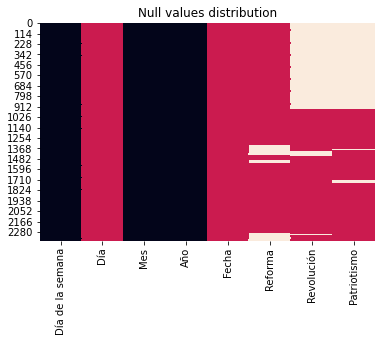

 Categorical   Numeric   NaN 


In [232]:
# Visualize data
heatmap = contador.isnull()
for k,v in dic_cols.items():
    if v == "num":
        heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
    else:
        heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
        
sns.heatmap(heatmap, cbar=False).set_title('Null values distribution')
plt.show()
print("\033[1;37;40m Categorical ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

In [233]:
contador.head(1)

,Día de la semana,Día,Mes,Año,Fecha,Reforma,Revolución,Patriotismo
0,sabado,16,noviembre,2013,2013-11-16,613.0,NaN,NaN


In [234]:
contador[contador['Revolución'].notnull()].head(4)

,Día de la semana,Día,Mes,Año,Fecha,Reforma,Revolución,Patriotismo
941,martes,14,junio,2016,2016-06-14,2884.0,333.0,256.0
942,miercoles,15,junio,2016,2016-06-15,2909.0,864.0,993.0
943,jueves,16,junio,2016,2016-06-16,283.0,855.0,901.0
944,viernes,17,junio,2016,2016-06-17,2695.0,889.0,856.0


The first counter that the government installed seems to be Reforma, in **16 Nov 2013**. Then the counters for avenue Revolución and Patriotismo were installed in **14 June 2016**.

To handle the **missing values**, we can follow two steps:
- Replace Revolución and Patriotismo null values up to 14 June 2016 with a cero, since cero bicycles were, in a way, counted by the counters.
- Fill the rest of the nulls with a forward fill. This way, we can get a good approximation of the cyclists in a day by using the last day of which we have available data.  

Using the average or the mode would be misleading, since the number of cyclists over time will probably fluctuate. Also, droping the nulls would alter the total cyclists in a given year since the nulls are clustered in certain areas.

In [235]:
# Fill missing values up to the installation of the counters.
contador.loc[0:940, ['Revolución', 'Patriotismo']] = contador.loc[0:940, ['Revolución', 'Patriotismo']].fillna(0)

In [236]:
# Fill the rest of the missing values with a forward fill
counter_columns = ['Reforma', 'Revolución', 'Patriotismo']
for counter in counter_columns:
    contador[counter] = contador[counter].fillna(method='ffill')

In [237]:
contador.isnull().sum()

Día de la semana    0
Día                 0
Mes                 0
Año                 0
Fecha               0
Reforma             0
Revolución          0
Patriotismo         0
dtype: int64

In [238]:
# Create column with total cyclists of a given day
contador['total'] = contador['Patriotismo'] + contador['Revolución'] + contador['Reforma']
contador['total'] = contador['total'].astype('int64')

In [239]:
# Change column type to integer.
for counter in counter_columns:
    contador[counter] = contador[counter].astype('int64')

In [240]:
contador.head()

,Día de la semana,Día,Mes,Año,Fecha,Reforma,Revolución,Patriotismo,total
0,sabado,16,noviembre,2013,2013-11-16,613,0,0,613
1,domingo,17,noviembre,2013,2013-11-17,1084,0,0,1084
2,lunes,18,noviembre,2013,2013-11-18,1073,0,0,1073
3,martes,19,noviembre,2013,2013-11-19,1344,0,0,1344
4,miercoles,20,noviembre,2013,2013-11-20,2394,0,0,2394


### Save dataset

In [241]:
contador_final = contador.copy()

In [242]:
contador_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2374 entries, 0 to 2373
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Día de la semana  2374 non-null   object        
 1   Día               2374 non-null   int64         
 2   Mes               2374 non-null   object        
 3   Año               2374 non-null   int64         
 4   Fecha             2374 non-null   datetime64[ns]
 5   Reforma           2374 non-null   int64         
 6   Revolución        2374 non-null   int64         
 7   Patriotismo       2374 non-null   int64         
 8   total             2374 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 167.0+ KB


In [243]:
contador_final.to_csv('Data/contador_final.csv', index=False)

# 2. Road accidents

### Data exploration

In [244]:
incidentes.head(4)

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes
0,C5/191016/01871,16/10/2019,09:04:53,Miércoles,(A) La unidad de atención a emergencias fue de...,16/10/2019,2019,Octubre,09:23:53,VENUSTIANO CARRANZA,accidente-ciclista,19.44961,-99.11384,URGENCIAS MEDICAS,LLAMADA DEL 911,VENUSTIANO CARRANZA,"19.44961002,-99.11383992",10
1,C5/191016/03921,16/10/2019,13:35:39,Miércoles,(N) La unidad de atención a emergencias fue de...,16/10/2019,2019,Octubre,13:45:34,IZTAPALAPA,accidente-ciclista,19.36409,-99.06687,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,"19.36409004,-99.06687",10
2,C5/191016/05840,16/10/2019,17:35:24,Miércoles,(D) El incidente reportado se registró en dos ...,16/10/2019,2019,Octubre,17:43:03,CUAUHTEMOC,accidente-ciclista,19.42287,-99.12929,URGENCIAS MEDICAS,LLAMADA DEL 911,CUAUHTEMOC,"19.42287003,-99.12929004",10
3,C5/191017/02907,17/10/2019,11:27:11,Jueves,(A) La unidad de atención a emergencias fue de...,17/10/2019,2019,Octubre,12:16:53,CUAUHTEMOC,accidente-ciclista,19.43451,-99.14268,URGENCIAS MEDICAS,LLAMADA DEL 911,CUAUHTEMOC,"19.43451,-99.14267988",10


Let's work only with the columns that seem relevant for our purposes. 

In [245]:
incidentes = incidentes[['dia_semana', 'fecha_creacion', 'hora_creacion', 'mes', 'delegacion_inicio', 'latitud', 'longitud', 'geopoint']]

In [246]:
incidentes.head(4)

,dia_semana,fecha_creacion,hora_creacion,mes,delegacion_inicio,latitud,longitud,geopoint
0,Miércoles,16/10/2019,09:04:53,10,VENUSTIANO CARRANZA,19.44961,-99.11384,"19.44961002,-99.11383992"
1,Miércoles,16/10/2019,13:35:39,10,IZTAPALAPA,19.36409,-99.06687,"19.36409004,-99.06687"
2,Miércoles,16/10/2019,17:35:24,10,CUAUHTEMOC,19.42287,-99.12929,"19.42287003,-99.12929004"
3,Jueves,17/10/2019,11:27:11,10,CUAUHTEMOC,19.43451,-99.14268,"19.43451,-99.14267988"


In [247]:
incidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dia_semana         2924 non-null   object 
 1   fecha_creacion     2924 non-null   object 
 2   hora_creacion      2924 non-null   object 
 3   mes                2924 non-null   int64  
 4   delegacion_inicio  2924 non-null   object 
 5   latitud            2924 non-null   float64
 6   longitud           2924 non-null   float64
 7   geopoint           2924 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 182.9+ KB


We should transform the date and hour columns to a single datetime column. Also, let's see the distribution of hours of the reports, to check whether there are any mistakes.

In [248]:
incidentes.hora_creacion.value_counts()

11:12:21    2
10:53:17    2
18:50:41    2
19:19:09    2
13:38:00    2
           ..
17:34:17    1
23:02:31    1
16:39:14    1
19:24:42    1
20:48:02    1
Name: hora_creacion, Length: 2849, dtype: int64

All the hours seem to be properly registered.

In [249]:
incidentes.loc[incidentes['hora_creacion'].str.match(r'\d\d:\d\d:\d\d') == False, 'hora_creacion']

1166    0.796273148
1167     0.48255787
1168    0.793344907
1169    0.617974537
1170    0.756168981
1171    0.616134259
1172    0.519444444
1357    0.706597222
1358     0.37505787
1359    0.683344907
1360    0.626226852
1361    0.812592593
1609    0.373958333
1610    0.377256944
2109    0.861365741
2164    0.474282407
2165    0.799143519
2661    0.996238426
2749       0.998125
Name: hora_creacion, dtype: object

However, we have multiple values that do not have the proper format. Also, there does not seem to be a pattern to them. 

How to handle them? Let's see if they represent time expressed as number of seconds, in decimal form. 

Therefore, we will asign them the random hour of "00:00:00"

In [257]:
t = "11:12:21"
(h, m, s) = t.split(':')
result = int(h) * 3600 + int(m) * 60 + int(s)
result

40341

No, the numbers we had before are too large to represent seconds. 

Also, they have the proper format, so let's transform the time columns.

### Data cleaning

In [250]:
# Clean day column.
incidentes['dia_semana'] = incidentes['dia_semana'].str.lower()

In [251]:
# Combine date and time columns
fecha_hora = pd.Series(incidentes['fecha_creacion'] + ' ' + incidentes['hora_creacion'])

In [252]:
# Insert new column
incidentes.insert(1, 'fecha_hora', fecha_hora)

In [253]:
# Change new column to datetime format
incidentes['fecha_hora'] = pd.to_datetime(incidentes['fecha_hora'], format='%d/%m/%Y %H:%M:%S')

ValueError: time data '18/02/2020 0.796273148' does not match format '%d/%m/%Y %H:%M:%S' (match)

In [ ]:
# Change type of time columns
incidentes['fecha_creacion'] = pd.to_datetime(incidentes['fecha_creacion'], format='%d/%m/%Y')
incidentes['hora_creacion'] = pd.to_datetime(incidentes['hora_creacion'], format='%H:%M:%S')

In [215]:
incidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dia_semana         2924 non-null   object        
 1   fecha_hora         2924 non-null   datetime64[ns]
 2   fecha_creacion     2924 non-null   datetime64[ns]
 3   hora_creacion      2924 non-null   datetime64[ns]
 4   mes                2924 non-null   int64         
 5   delegacion_inicio  2924 non-null   object        
 6   latitud            2924 non-null   float64       
 7   longitud           2924 non-null   float64       
 8   geopoint           2924 non-null   object        
dtypes: datetime64[ns](3), float64(2), int64(1), object(3)
memory usage: 205.7+ KB


In [216]:
incidentes.head()

,dia_semana,fecha_hora,fecha_creacion,hora_creacion,mes,delegacion_inicio,latitud,longitud,geopoint
0,Miércoles,2019-10-16 09:04:53,2019-10-16,1900-01-01 09:04:53,10,VENUSTIANO CARRANZA,19.44961,-99.11384,"19.44961002,-99.11383992"
1,Miércoles,2019-10-16 13:35:39,2019-10-16,1900-01-01 13:35:39,10,IZTAPALAPA,19.36409,-99.06687,"19.36409004,-99.06687"
2,Miércoles,2019-10-16 17:35:24,2019-10-16,1900-01-01 17:35:24,10,CUAUHTEMOC,19.42287,-99.12929,"19.42287003,-99.12929004"
3,Jueves,2019-10-17 11:27:11,2019-10-17,1900-01-01 11:27:11,10,CUAUHTEMOC,19.43451,-99.14268,"19.43451,-99.14267988"
4,Viernes,2019-10-18 18:11:00,2019-10-18,1900-01-01 18:11:00,10,BENITO JUAREZ,19.38966,-99.18504,"19.38966003,-99.18504"


In [30]:
incidentes['dia_semana'] = incidentes['dia_semana'].str.replace('á', 'a').str.replace('é', 'e')

In [31]:
incidentes['hora'] = incidentes['fecha_hora'].dt.hour
incidentes['año'] = incidentes['fecha_hora'].dt.year
incidentes['mes'] = incidentes['fecha_hora'].dt.month

In [32]:
dict_meses

{'enero': 1,
 'febrero': 2,
 'marzo': 3,
 'abril': 4,
 'mayo': 5,
 'junio': 6,
 'julio': 7,
 'agosto': 8,
 'septiembre': 9,
 'octubre': 10,
 'noviembre': 11,
 'diciembre': 12}

In [33]:
incidentes['mes'] = incidentes['mes'].map(dict_meses_inverso)

In [34]:
incidentes_final = incidentes

In [35]:
incidentes_final.to_csv('Data/incidentes_final.csv', index=False)

## Estudio 2018 Ciclismo

In [36]:
pd.set_option('display.max_columns', 500)

In [37]:
columnas = ['CALLE_LEV', 'F1', 'P1', 'P3', 'P6', 'P15', 'P18', 'P19', 'P20', 'P21_NIVEL', 'P23_1']
nombres = ['calle_lev', 'edad', 'origen', 'destino', 'motivo_viaje', 'motivo_dejar_bici', 'robado_bici', 'robo_forma', 'sexo', 'educacion', 'ingreso_mensual']

In [38]:
estudio1 = estudio[columnas]

In [39]:
ch_columnas = estudio1.columns.tolist()
res = {ch_columnas[i]: nombres[i] for i in range(len(ch_columnas))}

In [40]:
estudio1 = estudio1.rename(columns=res)

In [41]:
dict_sexo = {1: 'Hombre', 2:'Mujer'}
dict_robado_bici = {1:'Sí', 2:'No', 8:'No sabe', 9:'No contestó'}
dict_robo_forma = {1:'Estacionada', 2:'En movimiento', 8:'No sabe', 9:'No contestó'}
dict_motivo_dejar_bici = {1:'Lesión o incapacidad',
                         2:'Fala mecánica de bici',
                         3: 'Cambio de trabajo',
                         4: 'Llevar prisa',
                         5: 'Recorrido muy largo',
                         6: 'Falta de infraestructura',
                         7: 'Clima',
                         8: 'Inseguridad',
                         9: 'No haya bici disponible',
                         10: 'Ningún motivo',
                         11: 'No sé',
                         12: 'No contestó'}

In [42]:
estudio1['sexo'] = estudio1['sexo'].map(dict_sexo)
estudio1['robado_bici'] = estudio1['robado_bici'].map(dict_robado_bici)
estudio1['robo_forma'] = estudio1['robo_forma'].map(dict_robo_forma)
estudio1['motivo_dejar_bici'] = estudio1['motivo_dejar_bici'].map(dict_motivo_dejar_bici)

In [43]:
estudio1.head() 

,calle_lev,edad,origen,destino,motivo_viaje,motivo_dejar_bici,robado_bici,robo_forma,sexo,educacion,ingreso_mensual
0,CAMINO VIEJO A MIXCOAC,48,2,1,2,Cambio de trabajo,Sí,Estacionada,Hombre,4,3
1,VASCO DE QUIROGA,35,1,3,9,Ningún motivo,No,NaN,Hombre,9,6
2,VASCO DE QUIROGA,43,2,2,1,Ningún motivo,No,NaN,Hombre,3,4
3,POSTA,54,1,7,9,Cambio de trabajo,No,NaN,Hombre,4,4
4,CALZADA DE LOS LEONES,35,1,4,4,Ningún motivo,No,NaN,Hombre,8,5


In [44]:
estudio_final = estudio1

In [45]:
estudio_final.to_csv('estudio_final.csv', index=False)

## Motivo de que dejarían bici

In [46]:
a = pd.Series(estudio_final['motivo_dejar_bici'].value_counts())

In [47]:
a.to_csv('Data/motivo_dejar_final.csv')